# Melanoma Detection Assignment
---

By Harsh R

## Dataset Description

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

## Problem Statement

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

## Importing Skin Cancer Data

To do: Take necessary actions to read the data

## Importing all the important libraries

In [89]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [90]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [91]:
# Defining the path for train and test images
## Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [92]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Total Images available for training: ", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print('Total Images available for validation: ', image_count_test)

Total Images available for training:  2239
Total Images available for validation:  118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

## Create a dataset

Define some parameters for the loader:

In [93]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [94]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [95]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [96]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data
#### A code to visualize one instance of all the nine classes present in the dataset

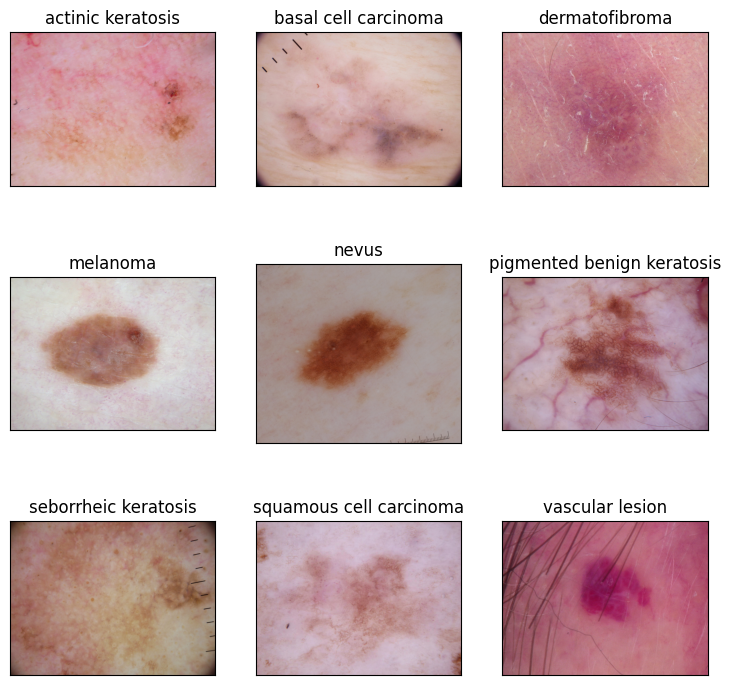

In [97]:
import matplotlib.pyplot as plt
import cv2

fig = plt.figure(figsize=(9,9))
for idx, image_class in enumerate(class_names):
    all_images_of_class = list(data_dir_train.joinpath(image_class).glob('*.jpg')) # List all the images for a particular class
    ax = fig.add_subplot(3, 3, 1 + idx, xticks=[], yticks=[])
    random_img_num = np.random.randint(len(all_images_of_class)) # Pick one random image of a class
    read_image = cv2.imread(str(all_images_of_class[random_img_num]))
    ax.set_title(image_class)
    plt.imshow(cv2.cvtColor(read_image, cv2.COLOR_BGR2RGB)) # Plot image in subplot


plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [98]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [99]:
### Your code goes here
num_classes = len(class_names)
inputs = keras.Input(shape=(img_width, img_height, 3))

# Center-crop images to 150x150
# Rescale images to [0, 1]
x = layers.Rescaling(scale=1.0 / 255)(inputs)

# Apply some convolution and pooling layers
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
x = layers.Activation("relu")(x)

# Apply global average pooling to get flat feature vectors
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(32)(x)
x = layers.Dense(16)(x)

# Add a dense classifier on top
outputs = layers.Dense(num_classes, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

## Compile the model
Choose an appropirate optimiser and loss function for model training

In [100]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [101]:
# View the summary of all layers
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_23 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 activation_27 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 activation_28 (Activation)  (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 90, 90, 32)        0   

## Train the model

In [102]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 27s 134ms/step - loss: 1.7832 - accuracy: 0.3867 - val_loss: 2.1706 - val_accuracy: 0.1477
Epoch 2/20
56/56 [==============================] - 3s 60ms/step - loss: 1.5726 - accuracy: 0.4358 - val_loss: 2.3569 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 3s 59ms/step - loss: 1.5240 - accuracy: 0.4459 - val_loss: 2.3384 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 3s 58ms/step - loss: 1.4795 - accuracy: 0.4565 - val_loss: 2.3991 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 3s 60ms/step - loss: 1.4360 - accuracy: 0.4693 - val_loss: 1.8168 - val_accuracy: 0.3199
Epoch 6/20
56/56 [==============================] - 3s 59ms/step - loss: 1.4230 - accuracy: 0.4888 - val_loss: 1.9194 - val_accuracy: 0.2595
Epoch 7/20
56/56 [==============================] - 3s 58ms/step - loss: 1.3838 - accuracy: 0.4961 - val_loss: 1.8113 - val_accuracy: 0.3400
Epoch 8/20


## Visualizing training results

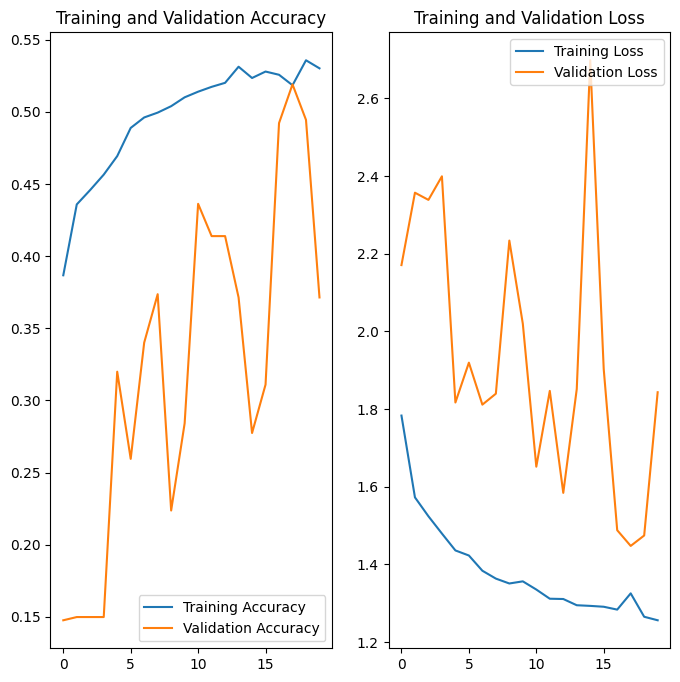

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit

We are obtaining a training accuracy of 53% and test accuracy of 37%.
The model is underfitting. But the loss is still going down, so maybe more training is needed.

## Write your findings here

In [104]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = tf.keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomFlip("vertical"),
    layers.experimental.preprocessing.RandomRotation((-0.2, 0.2))
  ]
)

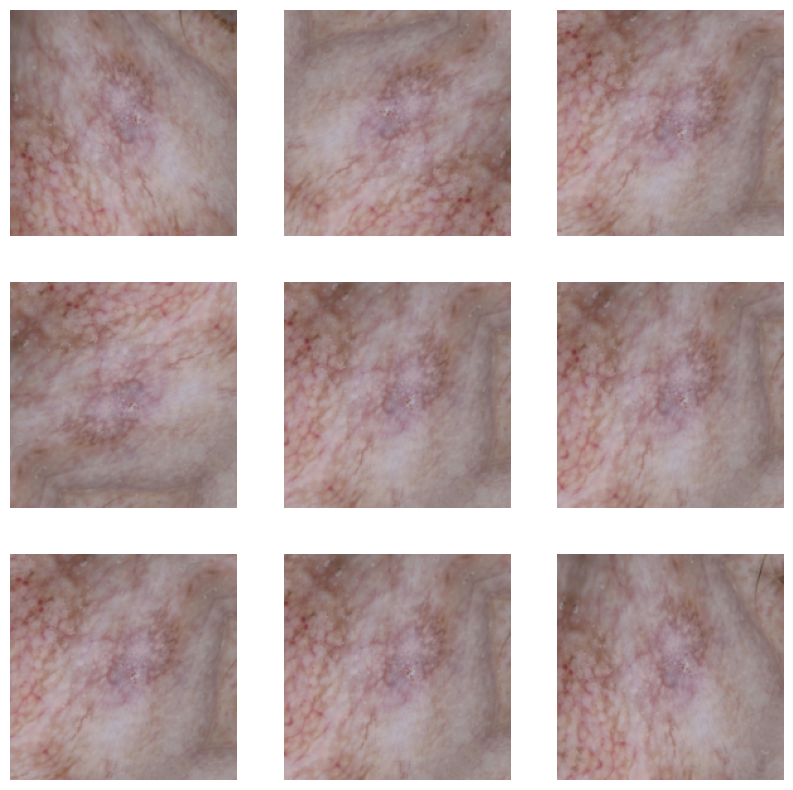

In [105]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
## Create the model, compile and train the model


In [106]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

def get_model(input_shape, num_classes):
    ### Your code goes here
    inputs = layers.Input(shape=(img_width, img_height, 3))

    # Rescale images to [0, 1]
    x = layers.Rescaling(scale=1.0 / 255)(inputs)

    # augmentation
    x = data_augmentation(x)

    # Apply some convolution and pooling layers
    x = layers.Conv2D(filters=8, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Apply global average pooling to get flat feature vectors
    #x = layers.GlobalAveragePooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1024)(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256)(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.5)(x)

    # Add a dense classifier on top
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

### Compiling the model

In [107]:
## Your code goes here
model = get_model(input_shape=(img_width, img_height, 3),
                   num_classes=num_classes)

model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
    )

In [108]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 180, 180, 8)       224       
                                                                 
 batch_normalization_14 (Ba  (None, 180, 180, 8)       32        
 tchNormalization)                                               
                                                                 
 activation_32 (Activation)  (None, 180, 180, 8)       0         
                                                           

### Training the model

In [109]:
## Your code goes here, note: train your model for 20 epochs
epochs = 50

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.1,
                                        patience=10,
                                        verbose=0,
                                        mode='auto',
                                        min_delta=0.002,
                                        cooldown=0,
                                        min_lr=0)
]

history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50
56/56 [==============================] - 5s 34ms/step - loss: 2.5027 - accuracy: 0.2165 - val_loss: 2.1489 - val_accuracy: 0.1499 - lr: 0.0010
Epoch 2/50
56/56 [==============================] - 2s 27ms/step - loss: 1.8118 - accuracy: 0.3471 - val_loss: 2.1357 - val_accuracy: 0.1544 - lr: 0.0010
Epoch 3/50
56/56 [==============================] - 1s 25ms/step - loss: 1.6493 - accuracy: 0.4163 - val_loss: 2.0513 - val_accuracy: 0.2595 - lr: 0.0010
Epoch 4/50
56/56 [==============================] - 1s 24ms/step - loss: 1.5268 - accuracy: 0.4660 - val_loss: 1.8100 - val_accuracy: 0.3490 - lr: 0.0010
Epoch 5/50
56/56 [==============================] - 1s 24ms/step - loss: 1.4946 - accuracy: 0.4621 - val_loss: 1.8995 - val_accuracy: 0.3647 - lr: 0.0010
Epoch 6/50
56/56 [==============================] - 1s 24ms/step - loss: 1.3918 - accuracy: 0.5089 - val_loss: 1.8677 - val_accuracy: 0.3356 - lr: 0.0010
Epoch 7/50
56/56 [==============================] - 1s 24ms/step - loss: 1.3

### Visualizing the results

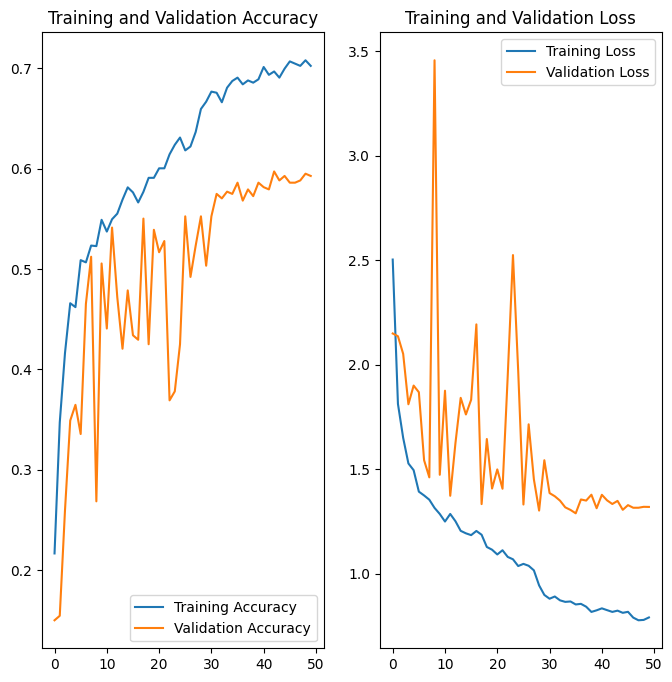

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


### It can be clearly seen that the accuracy has increased from 53% to 70% and validation accuracy jumped from 37% to 59%. This is clearly better than when the dataset was trained without any augmentation.

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [111]:
## Your code goes here.
from collections import Counter
train_labels = []
for file in list(data_dir_train.glob('*/*.jpg')):
    label = str(file).split('/')[-2]
    train_labels.append(label)
Counter(train_labels)

Counter({'actinic keratosis': 114,
         'melanoma': 438,
         'nevus': 357,
         'squamous cell carcinoma': 181,
         'seborrheic keratosis': 77,
         'basal cell carcinoma': 376,
         'dermatofibroma': 95,
         'pigmented benign keratosis': 462,
         'vascular lesion': 139})

#### Write your findings here:
#### - Which class has the least number of samples?

Answer: Seborrheic Keratosis (77)

#### - Which classes dominate the data in terms proportionate number of samples?

Answer: Pigmented Benign Keratosis (462)

#### Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [112]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [113]:
path_to_training_dataset = pathlib.Path("/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(os.path.join(path_to_training_dataset, i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2E4C33A350>: 100%|██████████| 500/500 [00:16<00:00, 30.30 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2F16628430>: 100%|██████████| 500/500 [00:16<00:00, 30.09 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2E4C648190>: 100%|██████████| 500/500 [00:20<00:00, 24.21 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=962x674 at 0x7B2E9854CF40>: 100%|██████████| 500/500 [01:27<00:00,  5.73 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2E581DC970>: 100%|██████████| 500/500 [01:23<00:00,  5.97 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7B2E59516680>: 100%|██████████| 500/500 [00:18<00:00, 26.92 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7B2F16628430>: 100%|██████████| 500/500 [00:37<00:00, 13.25 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2E5978D540>: 100%|██████████| 500/500 [00:17<00:00, 28.11 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7B2E4C11EDD0>: 100%|██████████| 500/500 [00:17<00:00, 29.18 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [114]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [115]:
from glob import glob

In [116]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:5]

['/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029025.jpg_22e5f418-0703-4837-b90b-be6707ac84e3.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027580.jpg_adfa0b23-7267-451c-a708-877e2abe7a55.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0033705.jpg_20dbdb13-a32b-4c7a-b90c-b7c70abef0a1.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026149.jpg_1aeb4378-d505-40f4-8c85-67731d8245df.jpg',
 '/content/gdrive/MyDrive/dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis

In [117]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [118]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [119]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

In [120]:
new_df['Label'].value_counts()

actinic keratosis             500
melanoma                      500
nevus                         500
squamous cell carcinoma       500
seborrheic keratosis          500
basal cell carcinoma          500
dermatofibroma                500
pigmented benign keratosis    500
vascular lesion               500
Name: Label, dtype: int64

In [121]:
train_labels_augmented = train_labels + lesion_list_new
Counter(train_labels_augmented)

Counter({'actinic keratosis': 614,
         'melanoma': 938,
         'nevus': 857,
         'squamous cell carcinoma': 681,
         'seborrheic keratosis': 577,
         'basal cell carcinoma': 876,
         'dermatofibroma': 595,
         'pigmented benign keratosis': 962,
         'vascular lesion': 639})

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [122]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [123]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_to_training_dataset,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [124]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_to_training_dataset,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model (make sure to include normalization)

In [125]:
## your code goes here
model = get_model(input_shape=(img_width, img_height, 3), num_classes=num_classes)

#### Compile your model (Choose optimizer and loss function appropriately)

In [126]:
## your code goes here
model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
      loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy']
    )

####  Train your model

In [127]:
# epochs = 30
## Your code goes here, use 50 epochs.
epochs = 50

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.1,
                                        patience=10,
                                        verbose=0,
                                        mode='auto',
                                        min_delta=0.002,
                                        cooldown=0,
                                        min_lr=0)
]

history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 41s 215ms/step - loss: 2.0580 - accuracy: 0.2991 - val_loss: 2.2230 - val_accuracy: 0.0987 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 37s 214ms/step - loss: 1.5637 - accuracy: 0.4097 - val_loss: 1.9206 - val_accuracy: 0.3103 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 35s 195ms/step - loss: 1.4563 - accuracy: 0.4477 - val_loss: 1.6485 - val_accuracy: 0.3608 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 42s 244ms/step - loss: 1.4383 - accuracy: 0.4585 - val_loss: 2.7528 - val_accuracy: 0.2324 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 34s 196ms/step - loss: 1.3796 - accuracy: 0.4713 - val_loss: 1.6216 - val_accuracy: 0.4217 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 35s 202ms/step - loss: 1.3286 - accuracy: 0.4918 - val_loss: 1.3620 - val_accuracy: 0.4863 - lr: 0.0010
Epoch 7/50
169/169 [==============================] - 38s 215ms

####  Visualize the model results

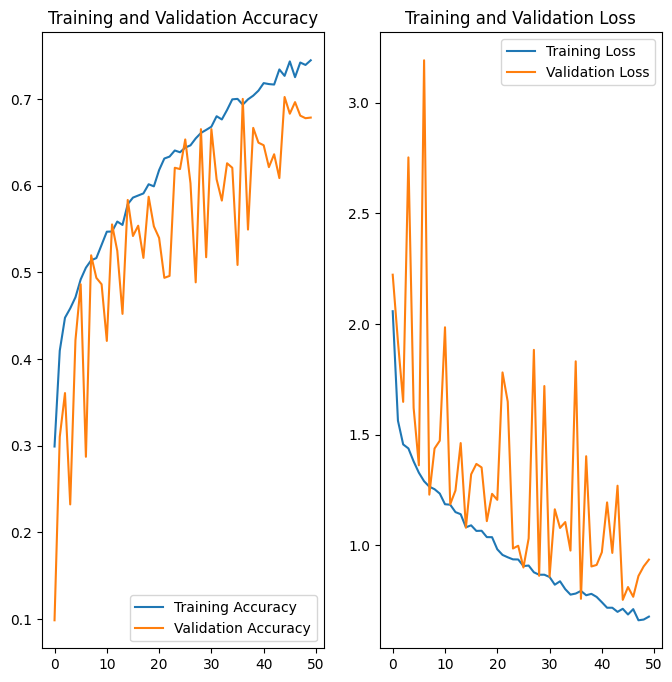

In [128]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



Balancing the labels helped with underfitting and improved the scores.

In [129]:
model.evaluate(train_ds)

169/169 [==============================] - 25s 143ms/step - loss: 0.7528 - accuracy: 0.7398


[0.7528097629547119, 0.7397996783256531]

In [130]:
model.evaluate(val_ds)

43/43 [==============================] - 7s 139ms/step - loss: 0.9360 - accuracy: 0.6785


[0.9360235333442688, 0.6785449385643005]

### The validation accuracy with the final model is `67.85 %`.